In [1]:
import pandas as pd
import mysql.connector
from datetime import datetime
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Table-1 users-Copy1.csv")

In [3]:
df.head(10)

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
5,5.0,2013-01-01 13:39:51,2463.0,spanish,NaN,pending
6,6.0,2013-01-01 18:37:27,11699.0,english,2013-01-01 18:38:45,active
7,7.0,2013-01-01 16:19:01,4765.0,french,2013-01-01 16:20:28,active
8,8.0,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active
9,9.0,2013-01-01 08:04:17,1.0,french,NaN,pending


In [22]:
cnn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root@123',
    database='trianity_3'
)

cursor = cnn.cursor()

In [ ]:
cursor.execute('''CREATE TABLE users (
    user_id INT PRIMARY KEY,
    created_at DATETIME,
    company_id INT,
    language VARCHAR(50),
    activated_at DATETIME,
    state VARCHAR(50)
);

CREATE TABLE events (
    user_id INT,
    occurred_at DATETIME,
    event_type VARCHAR(50),
    event_name VARCHAR(50),
    location VARCHAR(50),
    device VARCHAR(50),
    user_type VARCHAR(50)
);

CREATE TABLE email_events (
    user_id INT,
    occurred_at DATETIME,
    action VARCHAR(50),
    user_type VARCHAR(50)
);
''')

In [5]:
for _, row in df.iterrows():
    user_id = row['user_id']
    created_at = row['created_at']
    company_id = row['company_id']
    language = row['language']
    activated_at = row['activated_at'] if not pd.isnull(row['activated_at']) else None
    state = row['state']

    insert_query = "INSERT INTO users (user_id, created_at, company_id, language, activated_at, state) VALUES (%s, %s, %s, %s, %s, %s)"
    
    with cnn.cursor() as cursor:
                cursor.execute(insert_query, (user_id, created_at, company_id, language, activated_at, state))
                cnn.commit()


In [ ]:
cursor.execute('''SELECT * FROM users;''')
for row in cursor:
    print(row)

In [4]:
import pandas as pd

data= pd.read_csv("Table-2 events.csv")
events_df = pd.DataFrame(data)


for _, row in events_df.iterrows():
    user_id = row['user_id'] if not pd.isnull(row['user_id']) else None
    occurred_at = row['occurred_at'] if not pd.isnull(row['occurred_at']) else None
    event_type = row['event_type'] if not pd.isnull(row['event_type']) else None
    event_name = row['event_name'] if not pd.isnull(row['event_name']) else None
    location = row['location'] if not pd.isnull(row['location']) else None
    device = row['device'] if not pd.isnull(row['device']) else None
    user_type = row['user_type'] if not pd.isnull(row['user_type']) else None

    insert_query = "INSERT INTO events (user_id, occurred_at, event_type, event_name, location, device, user_type) VALUES (%s, %s, %s, %s, %s, %s, %s)"

    with cnn.cursor() as cursor:
        cursor.execute(insert_query, (user_id, occurred_at, event_type, event_name, location, device, user_type))
        cnn.commit()



In [ ]:
cursor.execute('''SELECT * FROM events;''')
for row in cursor:
    print(row)

In [6]:
import pandas as pd

data= pd.read_csv("Table-3 email_events.csv")
email_df = pd.DataFrame(data)


for _, row in email_df.iterrows():
    user_id = row['user_id'] if not pd.isnull(row['user_id']) else None
    occurred_at = row['occurred_at'] if not pd.isnull(row['occurred_at']) else None
    action = row['action'] if not pd.isnull(row['action']) else None
    user_type = row['user_type'] if not pd.isnull(row['user_type']) else None

    insert_query = "INSERT INTO email_events (user_id, occurred_at, action, user_type) VALUES (%s, %s, %s, %s)"

    with cnn.cursor() as cursor:
        cursor.execute(insert_query, (user_id, occurred_at, action, user_type))
        cnn.commit()

In [ ]:
cursor.execute('''SELECT * FROM email_events;''')
for row in cursor:
    print(row)

In [10]:
# Question 1

In [16]:
cursor.execute('''CREATE VIEW weekly_user_engagement AS
SELECT e.user_id, WEEK(e.occurred_at) AS week, COUNT(*) AS engagement_count
FROM events e
WHERE e.event_type IN ('engagement')
GROUP BY e.user_id, week;
''')

In [ ]:
cursor.execute('''SELECT *
FROM weekly_user_engagement
ORDER BY week;
''')
for row in cursor:
    print(row)

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\3485100019.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnn)


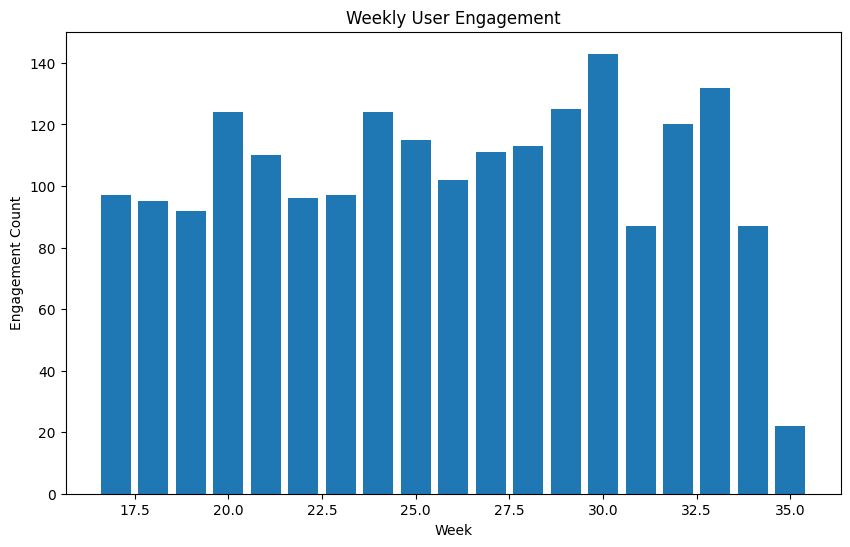

In [23]:
query = "SELECT * FROM weekly_user_engagement"
df = pd.read_sql(query, cnn)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['week'], df['engagement_count'])
plt.xlabel('Week')
plt.ylabel('Engagement Count')
plt.title('Weekly User Engagement')
plt.show()

In [ ]:
# Question 2

In [24]:
cursor.execute('''CREATE VIEW user_growth AS
SELECT DATE_FORMAT(u.created_at, '%Y-%m') AS period, COUNT(DISTINCT u.user_id) AS user_count
FROM users u
GROUP BY period;
''')

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\1748326645.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnn)


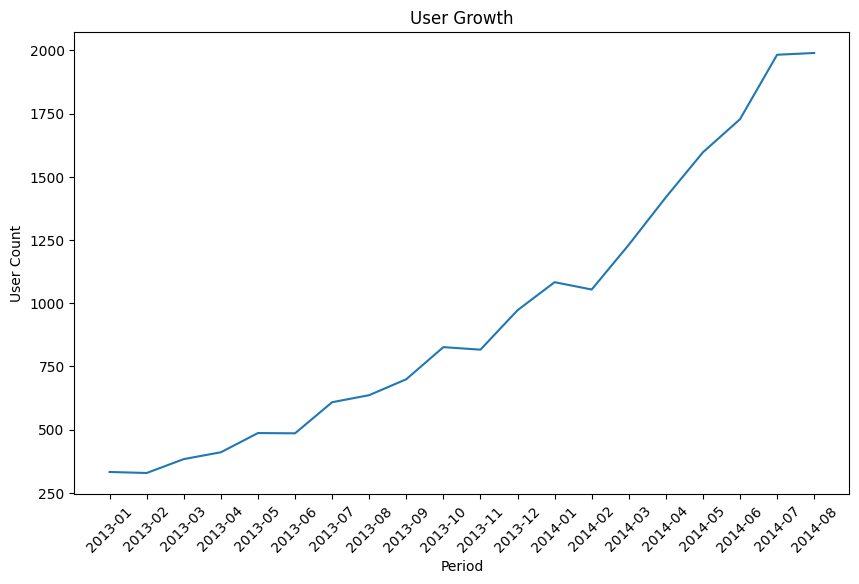

In [25]:
query = "SELECT * FROM user_growth"
df = pd.read_sql(query, cnn)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['period'], df['user_count'])
plt.xlabel('Period')
plt.ylabel('User Count')
plt.title('User Growth')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Question 3

In [26]:
cursor.execute('''CREATE VIEW weekly_retention AS
SELECT u.created_at, WEEK(e.occurred_at) AS week, COUNT(DISTINCT u.user_id) AS retention_count
FROM users u
LEFT JOIN events e ON u.user_id = e.user_id
WHERE e.occurred_at >= u.created_at
GROUP BY u.created_at, week;
''')


In [ ]:
cursor.execute('''SELECT *
FROM weekly_retention
''')
for row in cursor:
    print(row)

In [30]:
cursor.execute('''CREATE VIEW weekly_engagement_per_device AS
SELECT e.device, WEEK(e.occurred_at) AS week, COUNT(*) AS engagement_count
FROM events e
WHERE e.event_type IN ('engagement')
GROUP BY e.device, week;
''')



In [ ]:
#Question 4

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\3015822319.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnn)


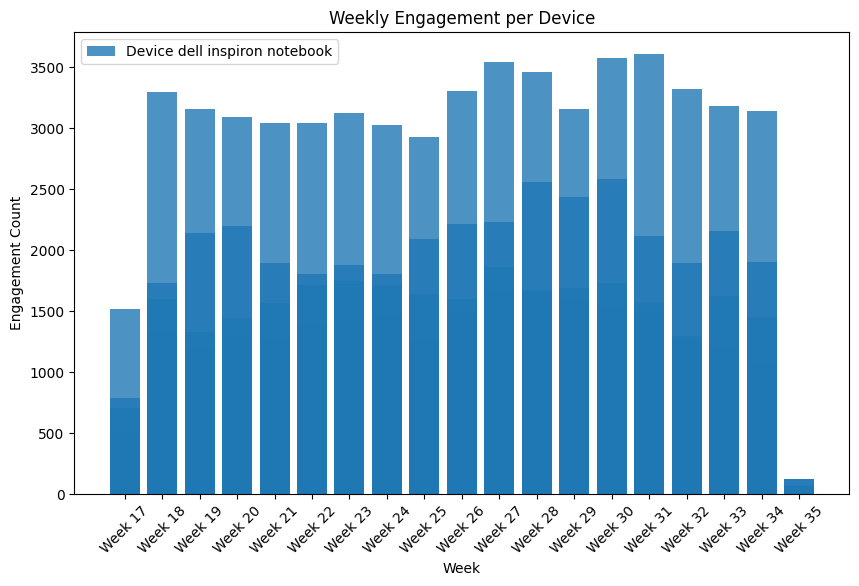

In [35]:
query = "SELECT * FROM weekly_engagement_per_device"
df = pd.read_sql(query, cnn)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['week'], df['engagement_count'], align='center', alpha=0.8)
plt.xlabel('Week')
plt.ylabel('Engagement Count')
plt.title('Weekly Engagement per Device')

# Set x-axis tick labels to be week numbers
week_labels = ['Week {}'.format(week) for week in df['week'].unique()]
plt.xticks(df['week'].unique(), week_labels, rotation=45)

# Show device names as a legend
devices = df['device'].unique()
device_labels = ['Device {}'.format(device) for device in devices]
plt.legend(device_labels)

plt.show()

In [ ]:
cursor.execute('''SELECT *
FROM weekly_engagement_per_device
''')
for row in cursor:
    print(row)

In [ ]:
# Question 5

In [36]:
cursor.execute('''CREATE VIEW email_engagement_metrics AS
SELECT e.user_type, COUNT(*) AS engagement_count
FROM email_events e
GROUP BY e.user_type;
''')

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\3820390423.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnn)


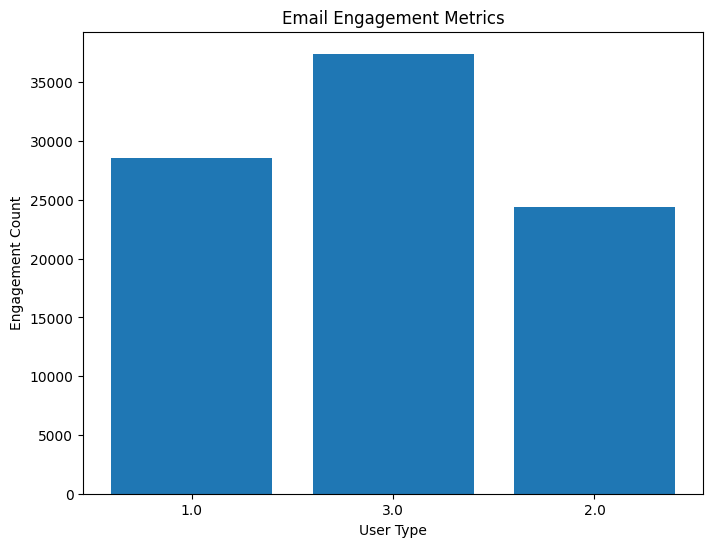

In [37]:
query = "SELECT * FROM email_engagement_metrics"
df = pd.read_sql(query, cnn)

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['user_type'], df['engagement_count'])
plt.xlabel('User Type')
plt.ylabel('Engagement Count')
plt.title('Email Engagement Metrics')

plt.show()